In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/processed/3_training_labelled_set.csv')

In [3]:
X = df.iloc[:,:-2]
y = df['gender'].map({'F':1,'M':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [4]:
input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#encoder = Dropout(keep_prob=0.9)(encoder)
encoder = Dense(int(encoding_dim / 3), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 4), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 6), activation="relu")(encoder)
encoder = Dense(1, activation='sigmoid')(encoder)
model = Model(inputs=input_layer, outputs=encoder)

In [5]:
nb_epoch = 150
batch_size = 32
model.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = model.fit(X_train, y_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 3495 samples, validate on 389 samples
Epoch 1/150
3495/3495 [==============================] - 1s 235us/step - loss: 10.1165 - acc: 0.9099 - val_loss: 8.8342 - val_acc: 0.9640
Epoch 2/150
3495/3495 [==============================] - 0s 73us/step - loss: 7.2535 - acc: 0.9591 - val_loss: 6.1640 - val_acc: 0.9820
Epoch 3/150
3495/3495 [==============================] - 0s 66us/step - loss: 4.6481 - acc: 0.9811 - val_loss: 3.5004 - val_acc: 0.9846
Epoch 4/150
3495/3495 [==============================] - 0s 76us/step - loss: 2.4406 - acc: 0.9791 - val_loss: 1.7823 - val_acc: 0.9794
Epoch 5/150
3495/3495 [==============================] - 0s 66us/step - loss: 1.2910 - acc: 0.9745 - val_loss: 0.9026 - val_acc: 0.9820
Epoch 6/150
3495/3495 [==============================] - 0s 81us/step - loss: 0.5920 - acc: 0.9874 - val_loss: 0.3983 - val_acc: 0.9897
Epoch 7/150
3495/3495 [==============================] - 0s 72us/step - loss: 0.2842 - acc: 0.9857 - val_loss: 0.1953 - val_acc: 0.9769

3495/3495 [==============================] - 0s 71us/step - loss: 0.0461 - acc: 0.9934 - val_loss: 0.0325 - val_acc: 0.9949
Epoch 61/150
3495/3495 [==============================] - 0s 82us/step - loss: 0.0381 - acc: 0.9951 - val_loss: 0.0332 - val_acc: 0.9923
Epoch 62/150
3495/3495 [==============================] - 0s 72us/step - loss: 0.0652 - acc: 0.9908 - val_loss: 0.0340 - val_acc: 0.9923
Epoch 63/150
3495/3495 [==============================] - 0s 78us/step - loss: 0.0356 - acc: 0.9957 - val_loss: 0.0518 - val_acc: 0.9871
Epoch 64/150
3495/3495 [==============================] - 0s 65us/step - loss: 0.0351 - acc: 0.9960 - val_loss: 0.0477 - val_acc: 0.9871
Epoch 65/150
3495/3495 [==============================] - 0s 75us/step - loss: 0.0572 - acc: 0.9903 - val_loss: 0.0895 - val_acc: 0.9871
Epoch 66/150
3495/3495 [==============================] - 0s 72us/step - loss: 0.0337 - acc: 0.9969 - val_loss: 0.0501 - val_acc: 0.9897
Epoch 67/150
3495/3495 [==============================

3495/3495 [==============================] - 0s 95us/step - loss: 0.0517 - acc: 0.9914 - val_loss: 0.0393 - val_acc: 0.9923
Epoch 120/150
3495/3495 [==============================] - 0s 96us/step - loss: 0.0735 - acc: 0.9863 - val_loss: 0.0920 - val_acc: 0.9871
Epoch 121/150
3495/3495 [==============================] - 0s 81us/step - loss: 0.0413 - acc: 0.9954 - val_loss: 0.0406 - val_acc: 0.9897
Epoch 122/150
3495/3495 [==============================] - 0s 95us/step - loss: 0.0305 - acc: 0.9983 - val_loss: 0.0399 - val_acc: 0.9897
Epoch 123/150
3495/3495 [==============================] - 0s 80us/step - loss: 0.0248 - acc: 0.9991 - val_loss: 0.0450 - val_acc: 0.9923
Epoch 124/150
3495/3495 [==============================] - 0s 81us/step - loss: 0.0261 - acc: 0.9974 - val_loss: 0.0499 - val_acc: 0.9923
Epoch 125/150
3495/3495 [==============================] - 0s 97us/step - loss: 0.0384 - acc: 0.9971 - val_loss: 0.0519 - val_acc: 0.9846
Epoch 126/150
3495/3495 [=======================

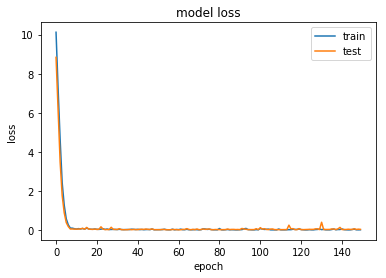

In [6]:
plt.plot(history['loss'][:])
plt.plot(history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [7]:
model.save_weights('../data/processed/model.h5')

In [8]:
cols = np.array(df.columns)
print(cols)

['afterpay_payments' 'average_discount_onoffer' 'cc_payments'
 'curvy_items' 'desktop_orders' 'devices' 'female_items' 'home_orders'
 'ios_orders' 'is_newsletter_subscriber' 'items' 'macc_items' 'male_items'
 'mapp_items' 'mftw_items' 'msite_orders' 'mspt_items' 'orders'
 'other_collection_orders' 'parcelpoint_orders' 'redpen_discount_used'
 'returns' 'sacc_items' 'shipping_addresses' 'unisex_items' 'vouchers'
 'wacc_items' 'wapp_items' 'wftw_items' 'wspt_items' 'labels' 'gender']


In [9]:
f = open("../data/processed/feature_list.txt", "w")
for c in cols[:-2]:
    f.write(c+'\n')
f.close()
